In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
def load_res(layer, model):
    res = pd.read_csv(f'../residuals/simple{layer}/{model}.csv')
    res.columns = ['t','r','sd']
    return res

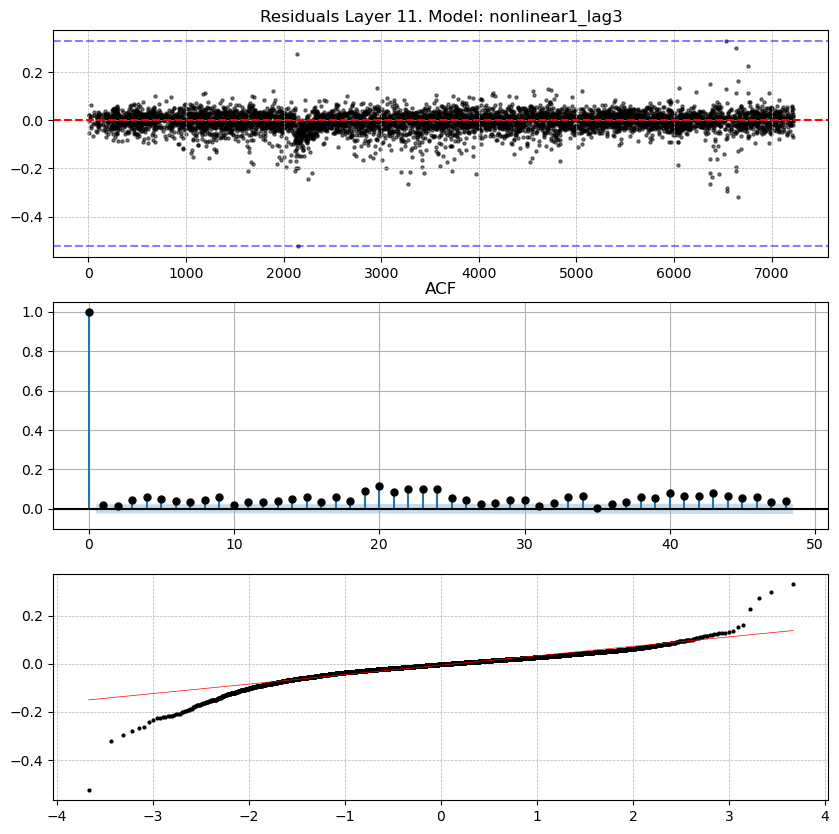

In [2]:

layer = 11


model = 'nonlinear1_lag3'
res = load_res(layer, model)
res = res[50:]
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
x = np.arange(0, len(res))
ax[0].scatter(x,res.r, s=5, alpha = 0.5, c='k')
ax[0].set_title(f'Residuals Layer {layer}. Model: {model}')
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].axhline(y=res.r.max(), color='b', linestyle='--', alpha=0.5)
ax[0].axhline(y=res.r.min(), color='b', linestyle='--', alpha=0.5)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
# ACF
plot_acf(res.r, ax=ax[1], lags=48, color='k', missing ='drop', title='ACF');
ax[1].grid(True)
ax[1].set_ylim(-0.1,1.05)
# QQ plot
osm, osr = probplot(res.r.dropna())
s, i, r = osr
ax[2].plot(osm[0], osm[1], 'o', color='k', markersize=2)
ax[2].plot(osm[0], s*osm[0]+i, color='r', linewidth=0.5)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)   




## params



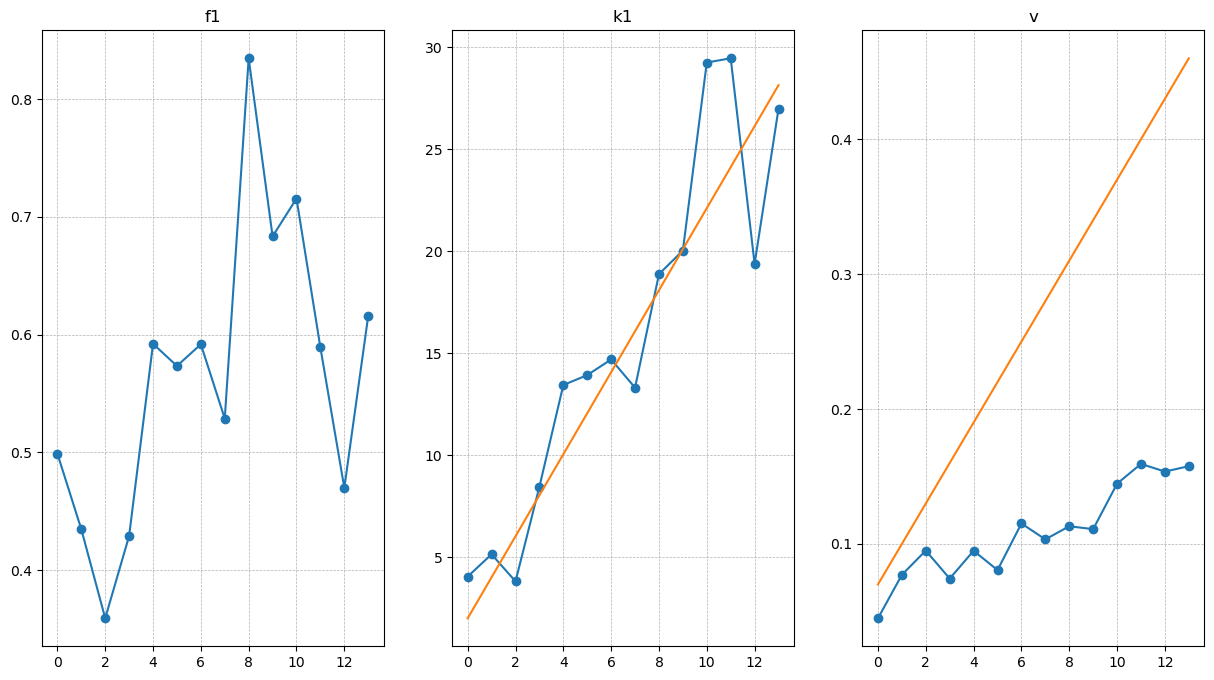

In [13]:
f1 = [-0.4989107, -0.4347566, -0.3591011, -0.4290061, -0.5922358, -0.5733842, -0.5918181, -0.5286904, -0.8347055, -0.6834661,  0.7155814 , 0.5890786 ,0.4698347,  0.6158887]
k1 = [4.054231 ,  5.146209 ,  3.818763 ,  8.457097 ,13.443027  ,13.928476, 14.695680 , 13.312021 , 18.875461 , 20.035248,-29.249122, -29.457640,-19.380444 ,-26.980431]
v = [1.576253e-01 ,1.536407e-01 ,1.593344e-01 ,1.446523e-01, 1.109652e-01,1.131090e-01 ,1.033882e-01, 1.151541e-01 ,8.060898e-02, 9.494536e-02, 0.07429546 ,9.507803e-02, 7.710201e-02 ,4.489243e-02]

f1 = np.array(f1)
k1 = np.array(k1)
v = np.array(v[::-1])

k = 2.01
v_ = 0.03

fig, ax = plt.subplots(1, 3, figsize=(15, 8))

ax[0].plot(abs(f1),marker='o')
ax[0].set_title('f1')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].plot(abs(k1),marker='o')
ax[1].set_title('k1')
ax[1].plot(k*np.arange(1,15))

ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].plot(v,marker='o')
ax[2].plot(v_*np.arange(1,15)+0.04)
ax[2].set_title('v')
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)



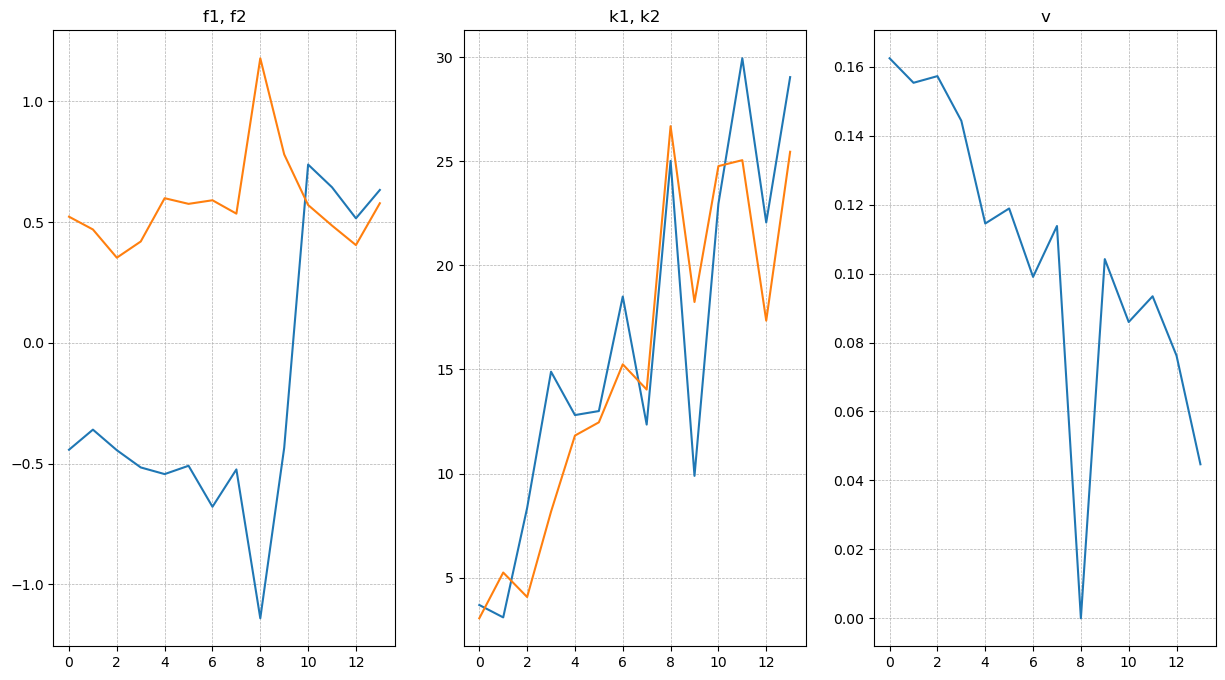

In [4]:
f1 = [-0.4428132, -0.3595978, -0.4446817, -0.5160454, -0.5436132, -0.5091382,-0.6788667, -0.5242434, -1.1403843, -0.4346937,  0.7377082,  0.6435895, 0.5151078,  0.6324894]
f2 = [-0.5217701, -0.4689331, -0.3521380, -0.4191533, -0.5983256, -0.5749298, -0.5898107, -0.5344769, -1.1775120, -0.7796747,  0.5702423,  0.4849610, 0.4042984,  0.5774609]

k1 = [3.682883, 3.087024, 8.345014, 14.892651, 12.808388, 13.001146, 18.504713, 12.352632, 25.021563, 9.887154, -22.960184, -29.951670, -22.062359, -29.046827]
k2 = [3.044838, 5.242156, 4.065896, 8.167953, 11.823403, 12.459846, 15.246811, 14.035075, 26.689127, 18.242663, -24.770573, -25.055720, -17.346984, -25.460153]

v = [1.624650e-01, 1.553550e-01, 1.572854e-01, 1.443330e-01, 1.145275e-01, 1.188933e-01, 9.904514e-02, 1.138065e-01, 1.009491e-07, 1.042026e-01, 8.595281e-02, 9.341787e-02, 7.620469e-02, 4.467386e-02]

f1 = np.array(f1)
f2 = np.array(f2)
k1 = np.array(k1)
k2 = np.array(k2)
v = np.array(v)

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
ax[0].plot((f1))
ax[0].plot(abs(f2))
ax[0].set_title('f1, f2')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].plot(abs(k1))
ax[1].plot(abs(k2))
ax[1].set_title('k1, k2')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].plot(v)
ax[2].set_title('v')
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)


In [5]:
X = np.vstack((np.ones(len(v)),np.arange(-14, 0)))
# X = np.vstack((np.ones(len(v)),np.arange(0, 14)))


a, b = np.linalg.inv(X @ X.T) @ X @ 

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(v)
ax.plot(a+b*np.arange(1, len(v)+1))
print(a,b)

SyntaxError: invalid syntax (1175760556.py, line 5)

In [ ]:
import numpy as np
from numpy import log, exp


log(8.85e-2)




-2.4247527269682534